# K-MEANS

**K-Means** is a method of vector quantization that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 

It is one of the simplest and popular **unsupervised** machine learning algorithms. Unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

![KMeans](img/KMeans.png)

## Algorithm

The most common algorithm is the Lloyd's algorithm which uses an iterative refinement technique of two steps: Assignment and Update.

Thus, given an initial set of $k$ means $m_1^{(1)},...,m_k^{(1)}$, the algorithm proceeds by alternating between the two steps:

1. **Assignment**. Assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance. https://en.wikipedia.org/wiki/Euclidean_distance

2. **Update**. Recalculate means (centroids) for observations assigned to each cluster.



## Algorithm Code

The standard algorithm was implemented:
1. k initial "means" are randomly generated within the data domain. 
2. k clusters are created by associating every observation with the nearest mean. (Assignment step)
3. The centroid of each of the k clusters becomes the new mean. (Update step)
4. Steps 2 and 3 are repeated until convergence has been reached.


In [1]:
import math
import random
import operator
import numpy as np
import matplotlib.pyplot as plt

# ===========================
# = K-Means Algorithm Steps =
# ===========================

def assignation_step(points, centroids):
	"""
	This method performs the assignation step of the algorithm.
	:param points: The points to be assigned.
	:param centroids: The k cluster's centroids.
	:return: A dict containing the cluster points.
	"""
	# Create dict to store cluster's list of points.
	centroids_dict = create_centroids_dict_lists(centroids)

	# For each point find the closet centroid.
	for point in points:
		centroids_dict[find_closet_centroid(point, centroids)].append(point)
	
	return centroids_dict


def update_step(centroids_dict, dim):
	"""
	This method performs the update algorithm step.
	:param centroids_dict: A dict containing the cluster points.
	:param dim: The dimension of the points.
	:return: A dict containing the cluster points.
	"""
	centroids = []

	# For each cluster centroid re-calculate its center by using the points assigned to this cluster.
	for centroid_points in centroids_dict:
		centroids.append(
				recalculate_centroid(
						centroid_points,
						group_by_dimension(
								centroids_dict[centroid_points],
								dim)))

	return centroids


# ============================
# = Running Algorithm Method =
# ============================

def k_means(data, k, iteration_number, centroids=None):
	"""
	This method performs the k-means algorithm for the given data and for the given iterations.
	:param data: The data to be clustered.
	:param k: Number of clusters
	:param iteration_number: Number of iterations to run the algorithm.
	:param centroids: The centroids coordinates. Default is None.
	:return: A dict containing the centroids and their points.
	"""
	if is_valid_data(data):
		# If centroids aren't given, then create random centroids.
		if centroids is None:
			centroids = crete_random_centroids(
					k,
					len(data[0]),
					np.amax(np.array(data)))

		# Starts the iterative refinement technique.
		# Alternate between two the steps.
		for i in range(iteration_number):
			centroids = update_step(
					assignation_step(data, centroids),
					len(data[0]))

		result = assignation_step(data, centroids)
	else:
		result = None
	
	return result


# ==================
# = Useful Methods =
# ==================

def find_closet_centroid(point, centroids):
	"""
	Find the closet center for the given point.
	:param point: Point to be clustered.
	:param centroids: The centers set.
	:return: The closet center.
	"""
	distances = {}
	
	# Calculate distance.
	for centroid in centroids:
		distances[repr(centroid)] = euclidean(point, centroid)
	
	# Sort points
	sorted_points = sorted(distances.items(), key=operator.itemgetter(1), reverse=False)
	
	# print(sorted_points)
	return sorted_points[0][0]


def euclidean(vector1, vector2):
	"""
	Calculate the Euclidean Distance between two vectors.
	:param vector1: Vector 1.
	:param vector2: Vector 2.
	:return: The distance between two vectors.
	"""
	return math.sqrt(((np.array(vector1) - np.array(vector2)) ** 2).sum())


def recalculate_centroid(centroid_coordinates, points):
	"""
	Recalculate centroid coordinates.
	:param centroid_coordinates: The current centroid's coordinates.
	:param points: The points assigned to the given centroid.
	:return: The new coordinates for the centroid.
	"""
	new_center = []
	
	# When dict is not empty, then calculate mean.
	if not is_empty_dict(points):
		for dimension in range(len(points.keys())):
			new_center.append(
					sum(points[dimension]) / len(points[dimension]))
	else:
		# If there isn't any point in the centroid, the return the centroid.
		new_center = eval(centroid_coordinates)

	return new_center


def create_centroids_dict_lists(centroids):
	"""
	Create a dict of empty lists for each centroid.
	:param centroids: The centroids to be in the dict.
	:return: A dict containing each centroid list of points.
	"""
	result = {}

	for centroid in centroids:
		result[repr(centroid)] = []

	return result


def is_empty_dict(dict1):
	"""
	This method returns whether a dict has an empty list() as value.
	:param dict1: The dict to be validated
	:return: True if the dict is empty. Otherwise, it returns false.
	"""
	for element in dict1:
		if len(dict1[element]) == 0:
			return True
	return False


def create_dict_lists(n):
	"""
	Create a dict of size n whose values are empty-lists.
	:param n: The number of elements in the dict.
	:return: A dict of size n.
	"""
	result = {}
	
	for i in range(n):
		result[i] = []
	
	return result


def group_by_dimension(data, dim):
	"""
	Group the data' attributes by dimension.
	:param data: Data.
	:param dim: The dimension of the points or number of attributes.
	:return: A dict containing the points' attribute values by dimension.
	"""
	dim_dict = create_dict_lists(dim)
	
	for data in data:
		for i in range(dim):
			dim_dict[i].append(data[i])
	
	return dim_dict


# ================
# = Data Methods =
# ================

def is_valid_data(data):
	"""
	This method returns whether the data is valid.
	:param data: This method validates the
	:return: True if the given data is valid. Otherwise, it returns false.
	"""
	if data is not None and \
			len(data) > 0 and \
			len(data[0]) > 0:
		for row in data:
			if len(row) != len(data[0]):
				return False
		return True
	else:
		return False


def crete_random_centroids(num_points, n_dim, max_value):
	"""
	Create random centroids.
	:param num_points: Number of centroids to be created.
	:param n_dim: n-dimension of each point.
	:param max_value: Maximum value points can take.
	:return: A List of random centroids of n-dimension.
	"""
	result = list()
	
	for i in range(1, num_points + 1):
		point = list()
		
		for j in range(n_dim):
			point.append(random.randrange(1, max_value))
		
		result.append(point)
	
	return result


def create_random_data(samples=200, n_dim=2, max_value=50):
	"""
	Create random points of data.
	:param samples: number of points to be created.
	:param n_dim: points' dimension.
	:param max_value: max_value points can take.
	:return: A List of random points of n-dimension.
	"""
	if samples < 1 and max_value < 1:
		return None

	list1 = []
	
	for i in range(samples):
		row = []

		for n in range(n_dim):
			row.append(random.randrange(1, max_value + 1))
		list1.append(row)
	
	return list1

### Methods to Plot Clusters

In [2]:
def plot_k_clusters(k_clusters):
	"""
	Plot k-clusters.
	:param k_clusters: The clusters' data to be plotted.
	"""
	print_cluster_dict = []
	
	for cluster in k_clusters:
		x_values_list = []
		y_values_list = []
		
		for point in k_clusters[cluster]:
			x_values_list.append(point[0])
			y_values_list.append(point[1])
		
		print_cluster_dict.append((x_values_list, y_values_list))
        
    
		
	colors = ["red", "green", "blue", "brown", "black", "grey", "cyan", "magenta", "yellow", "white"]
	markers = ["o", "^", "*", "x", "+"]

	plt.rcParams["figure.facecolor"] = "#EDECE7"
	plt.rcParams["axes.facecolor"] = "#DAE1D9"

	color_index = 0
	marker_index = 0
	for cluster in print_cluster_dict:
		plt.scatter(cluster[0],
				cluster[1],
				marker=markers[marker_index],
				color=colors[color_index],
				facecolors="none")
		color_index += 1
		
		# If all colors were used,
		# then reset color index and use another marker
		if color_index == len(colors):
			color_index = 0
			marker_index += 1
	
	plt.show()


In [3]:
def plot_data(data):
	"""
	Plot k-clusters when they are in 2-D.
	:param k_clusters: The clusters' data to be plotted.
	"""
	print_cluster_dict = []
	
	x_values_list = []
	y_values_list = []
    
	for point in data:
		x_values_list.append(point[0])
		y_values_list.append(point[1])

	plt.rcParams["figure.facecolor"] = "#EDECE7"
	plt.rcParams["axes.facecolor"] = "#DAE1D9"

	
	plt.scatter(x_values_list,
			y_values_list,
			marker="o",
			color="black",
			facecolors="none")
	
	plt.show()

### Random Data Generation 


300 observations with 2 attributes (2-D observations) are randomly generated. The attributes' domain is between 0 and 100.

In [4]:
random_data = create_random_data(samples=300, max_value=100)

### Plot Data

<IPython.core.display.Javascript object>


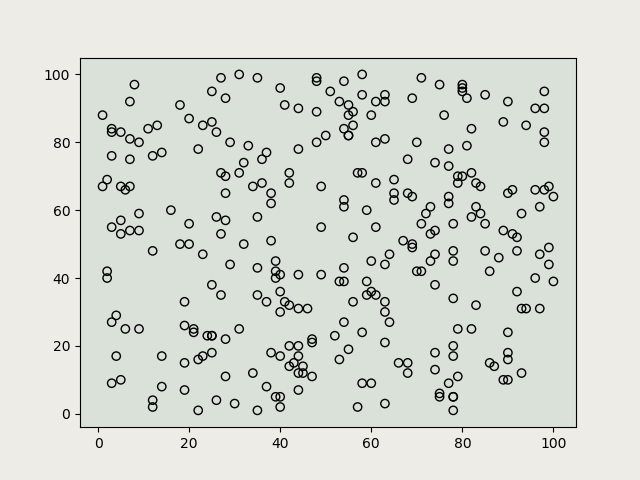

In [5]:
%matplotlib notebook
plot_data(random_data)

### Run K-Means Algorithm

* k = 2
* number of iterations = 1000

<IPython.core.display.Javascript object>


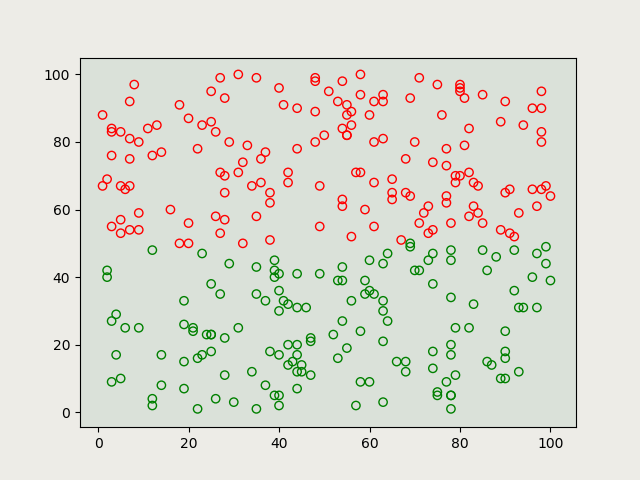

In [6]:
%matplotlib notebook

k = 2
iterations = 1000

plot_k_clusters(k_means(random_data, k, iterations))

* k = 5
* number of iterations = 1000
* The program 

<IPython.core.display.Javascript object>


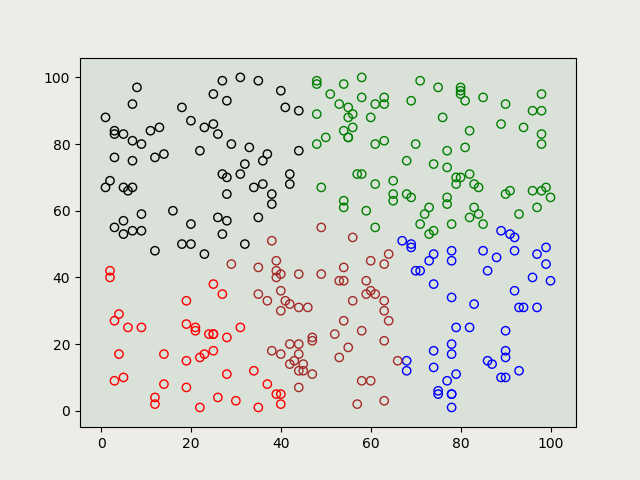

In [7]:
%matplotlib notebook
k = 5
iterations = 1000

plot_k_clusters(k_means(random_data, k, iterations))

* k = 12
* number of iterations = 1000
* The program 

<IPython.core.display.Javascript object>


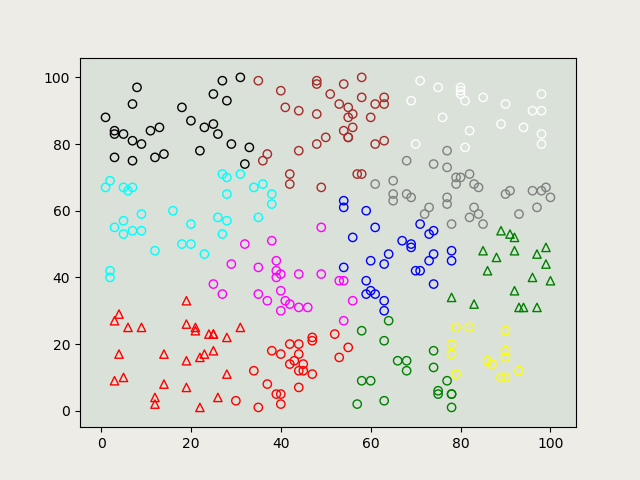

In [8]:
%matplotlib notebook
k = 12
iterations = 1000

plot_k_clusters(k_means(random_data, k, iterations))